# Part 1 – Python Programming & Data Manipulation:

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## 1. Load the data into a pandas DataFrame.

In [2]:
# Read the CSV File Using Pandas read_csv function
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,"122,8",1001,O.I184,0.2776,0.3001,O.I471,...,"25,38",17.33,184.6,2019,O.I622,0.6656,0.7119,0.2654,0.4601,O.I189
1,842517,M,2O.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,O.I238,O.I866,0.2416,O.I86,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,O.I096,O.I599,O.I974,O.I279,...,23.57,25.53,152.5,1709,O.I444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,O.I425,0.2839,0.2414,O.I052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,O.I73
4,84358402,M,20.29,14.34,135.1,1297,O.I003,O.I328,O.I98,O.I043,...,22.54,16.67,152.2,1575,O.I374,0.205,0.4,O.I625,0.2364,0.07678
5,843786,M,12.45,15.7,82.57,477.1,O.I278,O.I7,O.I578,0.08089,...,15.47,23.75,103.4,741.6,O.I791,O.5249,O.5355,O.I741,0.3985,O.I244
6,844359,M,18.25,19.98,119.6,1040,0.09463,O.I09,O.I127,0.074,...,"22,88",27.66,153.2,1606,O.I442,0.2576,0.3784,O.I932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.2,577.9,O.I189,O.I645,0.09366,0.05985,...,17.06,28.14,110.6,897,O.I654,0.3682,0.2678,O.I556,0.3196,O.I151
8,844981,M,13,21.82,87.5,519.8,O.I273,O.I932,O.I859,0.09353,...,15.49,30.73,106.2,739.3,O.I703,O.5401,O.539,0.206,0.4378,O.I072
9,84501001,M,12.46,24.04,83.97,475.9,O.I186,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,O.I853,1.058,1.105,0.221,0.4366,0.2075


## 2. Fix errors in data

In [3]:
# Fixing errors in data
df.replace({'O': 0, 'I': 1, ',': '.'}, inplace=True, regex=True)
df.dropna(inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       551 non-null    int64  
 1   diagnosis                551 non-null    object 
 2   radius_mean              551 non-null    object 
 3   texture_mean             551 non-null    object 
 4   perimeter_mean           551 non-null    object 
 5   area_mean                551 non-null    object 
 6   smoothness_mean          551 non-null    object 
 7   compactness_mean         551 non-null    object 
 8   concavity_mean           551 non-null    object 
 9   concave points_mean      551 non-null    object 
 10  symmetry_mean            551 non-null    object 
 11  fractal_dimension_mean   551 non-null    float64
 12  radius_se                551 non-null    object 
 13  texture_se               551 non-null    object 
 14  perimeter_se             5

In [5]:
fl_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for i in fl_col :
    df[i] = df[i].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       551 non-null    int64  
 1   diagnosis                551 non-null    object 
 2   radius_mean              551 non-null    float64
 3   texture_mean             551 non-null    float64
 4   perimeter_mean           551 non-null    float64
 5   area_mean                551 non-null    float64
 6   smoothness_mean          551 non-null    float64
 7   compactness_mean         551 non-null    float64
 8   concavity_mean           551 non-null    float64
 9   concave points_mean      551 non-null    float64
 10  symmetry_mean            551 non-null    float64
 11  fractal_dimension_mean   551 non-null    float64
 12  radius_se                551 non-null    float64
 13  texture_se               551 non-null    float64
 14  perimeter_se             5

In [6]:
print("Malignant = 1, Benign = 0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
df.head()

Malignant = 1, Benign = 0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.00000,0.27760,0.3001,0.00000,...,25.38,17.33,184.60,2019.0,0.0000,0.6656,0.7119,0.2654,0.4601,0.00000
1,842517,1,0.00,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.0000,0.0000,0.2416,0.0000,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.00000,0.00000,0.0000,0.00000,...,23.57,25.53,152.50,1709.0,0.0000,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.00000,0.28390,0.2414,0.00000,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.00000
4,84358402,1,20.29,14.34,135.10,1297.0,0.00000,0.00000,0.0000,0.00000,...,22.54,16.67,152.20,1575.0,0.0000,0.2050,0.4000,0.0000,0.2364,0.07678


## 3. Perform exploratory data analysis.

Ortalama tanı değeri =  0.3720508166969147
Veri noktaları toplamı =   551
Kötü Huylu (diagnosis =1) = 37.2%
İyi huylu (diagnosis =0)= 62.8%


<Axes: title={'center': 'Malignant (1) vs Benign Data(0) points'}, xlabel='diagnosis', ylabel='Number of data points'>

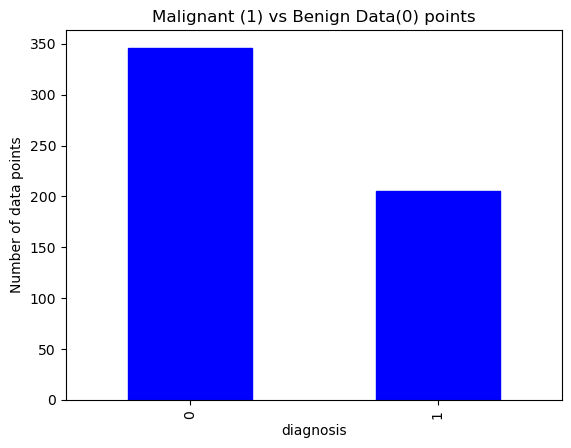

In [7]:
df["diagnosis"].value_counts()
print("Ortalama tanı değeri = " , df["diagnosis"].mean())
print("Veri noktaları toplamı =  ", len(df))
print("Kötü Huylu (diagnosis =1) = {}%".format(round(df["diagnosis"].mean(),3)*100))                          
print("İyi huylu (diagnosis =0)= {}%".format((1-round(df["diagnosis"].mean(),3))*100))
df.groupby("diagnosis")['id'].count().plot.bar(ylabel = "Number of data points",
                                               title = "Malignant (1) vs Benign Data(0) points", color = 'blue', edgecolor = "blue")

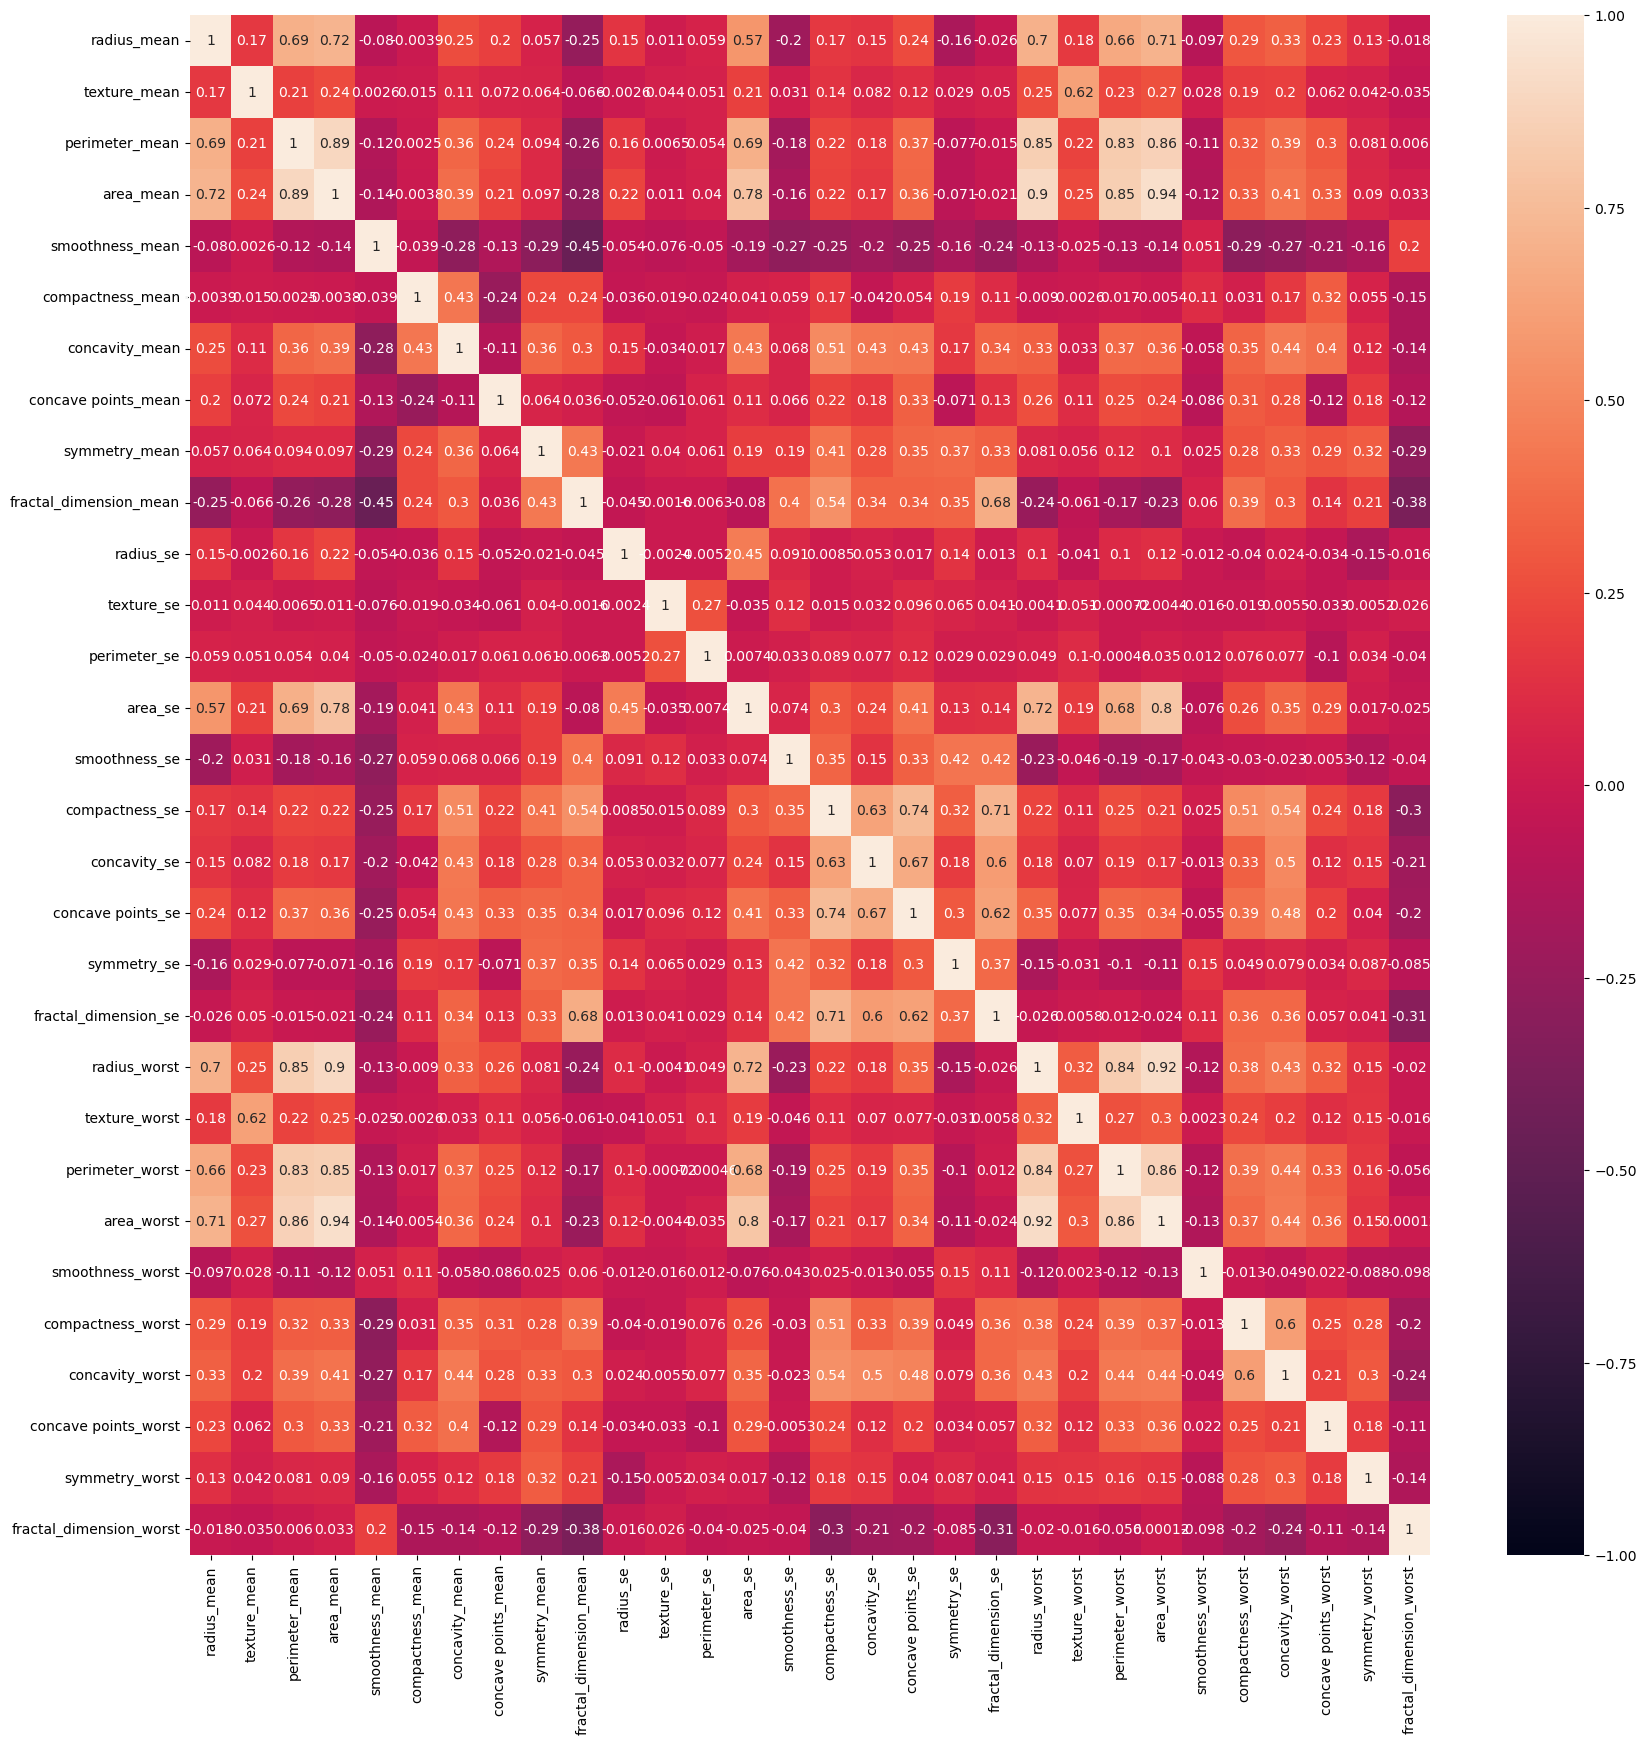

In [8]:
import seaborn as sns
df_1 = df.iloc[:, 2:]

plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()

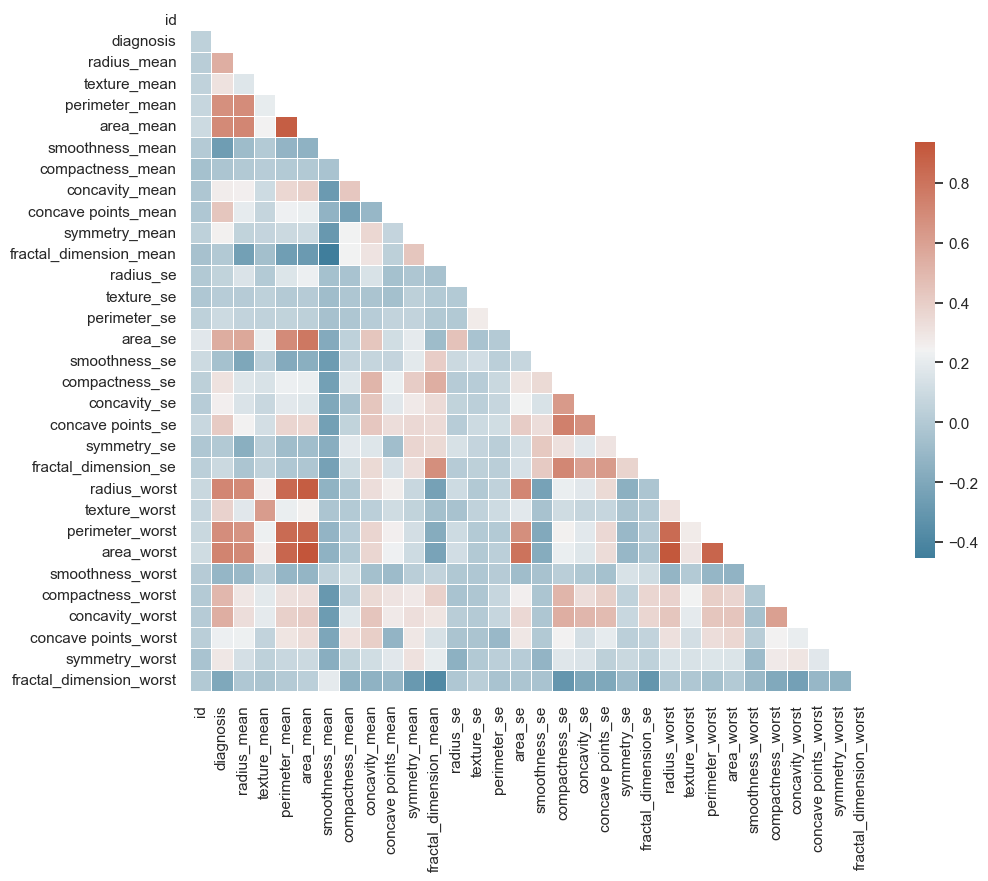

In [9]:
sns.set_theme(style="white")
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()

## Train Test Split

In [12]:
# Spliting target variable and independent variables
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [13]:
# Splitting the data into training set and testset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)


Size of training set: (440, 31)
Size of test set: (111, 31)


Size of training set: (440, 31)
Size of test set: (111, 31)


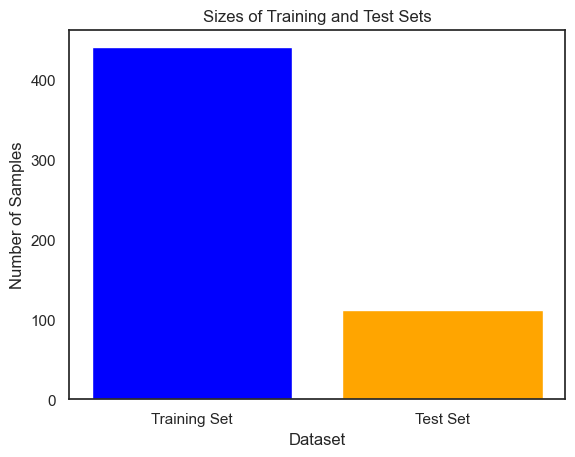

In [14]:
# Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)


# Eğitim ve test set boyutları
sizes = [X_train.shape[0], X_test.shape[0]]
labels = ['Training Set', 'Test Set']

# Çubuk grafik oluşturma
plt.bar(labels, sizes, color=['blue', 'orange'])

# Grafik başlığı ve eksin isimleri
plt.title('Sizes of Training and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')

# Grafiği gösterme
plt.show()

## Random Forest Model

Accuracy: 0.94595
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        40

    accuracy                           0.95       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.95      0.95      0.95       111



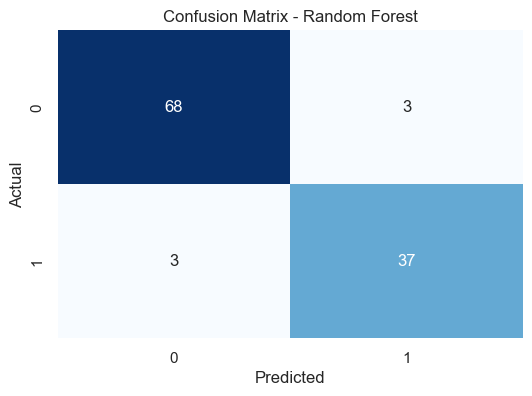

In [15]:
# Splitting the data into training set and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = random_forest_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Logistic Regression

Best hyperparametres: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.9640
Confusion Matrix:
 [[67  4]
 [ 0 40]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.91      1.00      0.95        40

    accuracy                           0.96       111
   macro avg       0.95      0.97      0.96       111
weighted avg       0.97      0.96      0.96       111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.91      1.00      0.95        40

    accuracy                           0.96       111
   macro avg       0.95      0.97      0.96       111
weighted avg       0.97      0.96      0.96       111



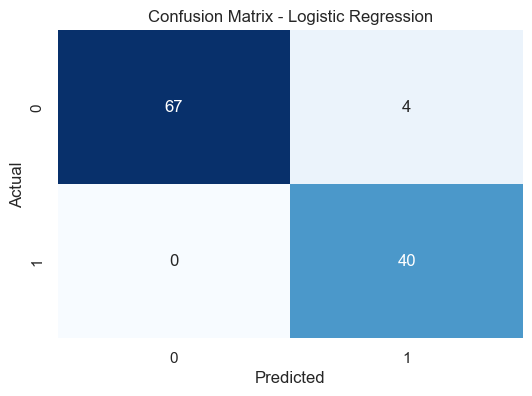

In [16]:
# Hedef değişken ve özellikleri belirleme
X = df.drop(['id', 'diagnosis'], axis=1)  # 'id' ve 'diagnosis' sütunlarını hariç tutuyoruz
y = df['diagnosis']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri setini ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik regresyon modelini oluşturma
logreg = LogisticRegression(max_iter=1000)

# Hiperparametre optimizasyonu için grid tanımlama
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']}


# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri bulma
best_params = grid_search.best_params_
print("Best hyperparametres:", best_params)

# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test seti üzerinde modelin performansını değerlendirme
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


# Report
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## KNN Model

Accuracy: 0.94595
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        40

    accuracy                           0.95       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.95      0.95      0.95       111



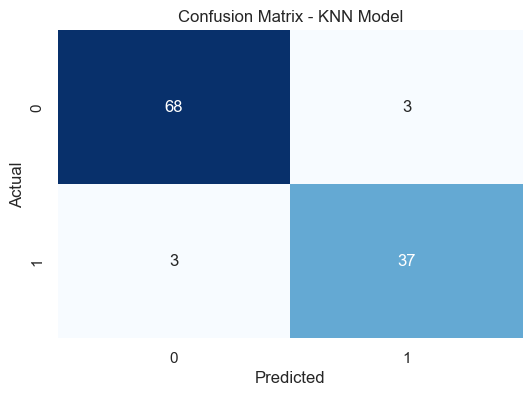

In [17]:
# Splitting the data into training set and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5 (5 komşu)
knn_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = knn_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




## SVM Model

Accuracy: 0.9459
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.97      0.93        40

    accuracy                           0.95       111
   macro avg       0.94      0.95      0.94       111
weighted avg       0.95      0.95      0.95       111



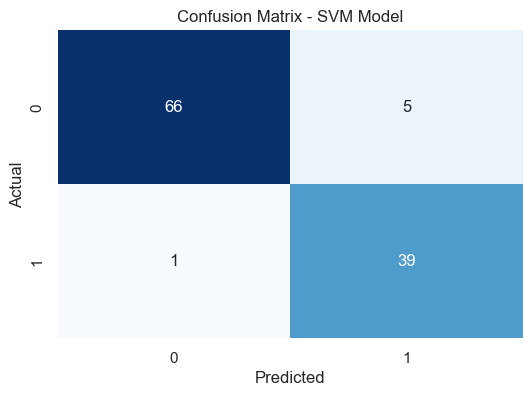

In [18]:
# Splitting the data into training set and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
svm_model = SVC(kernel='linear')  # Lineer kernel kullanıyoruz
svm_model.fit(X_train_scaled, y_train)
svm_model_rbf = SVC(kernel='poly')  # RBF kernel kullanıyoruz
svm_model_rbf.fit(X_train_scaled, y_train)

# Prediction
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
